In [1]:
import ROOT as r
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

import hist

In [3]:
rdf_sig = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/sig_MVA.root")
rdf_bkg = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/bkg_MVA.root")

Text(1, 68.1111111111111, 'ABCDNet Score')

findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back t

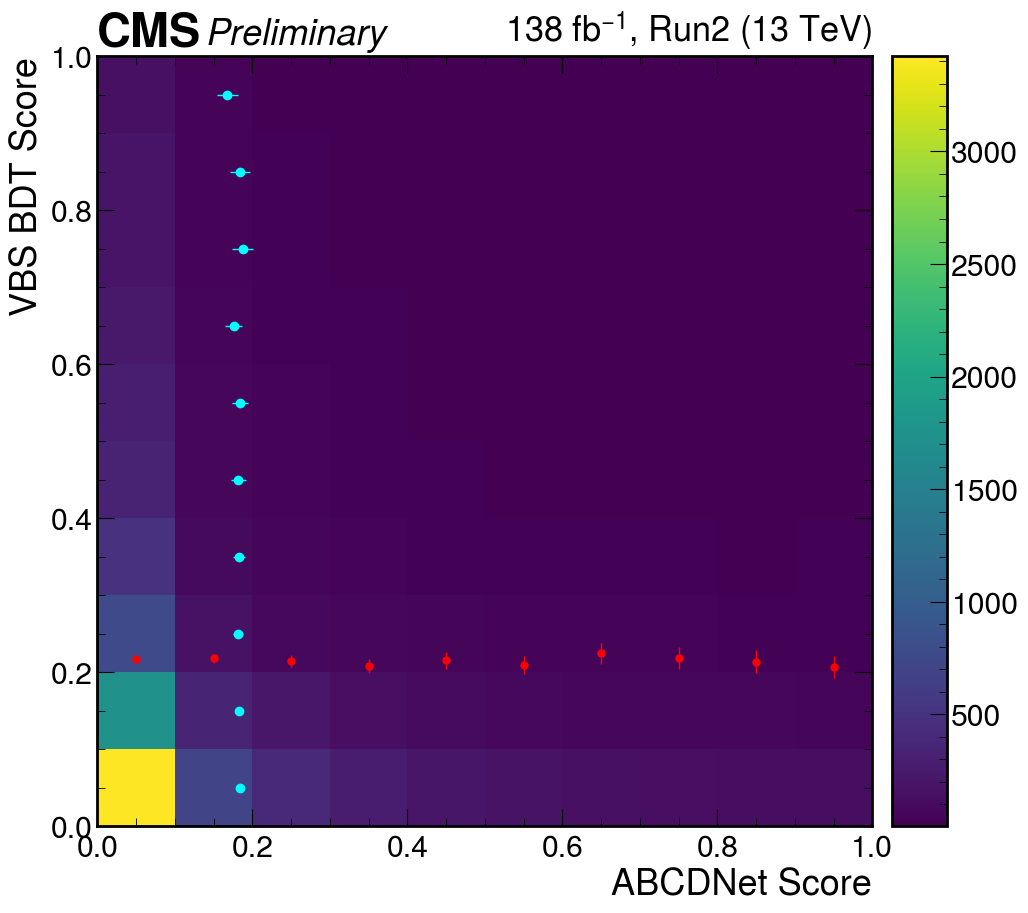

In [4]:
df = r.RDataFrame("Events", f"/data/userdata/aaarora/output/run2/bkg_MVA.root")
cols = df.AsNumpy(["abcdnet_score", "VBSBDTscore", "weight"])

h = hist.Hist.new.Reg(10, 0, 1, name="abcdnet_score").Reg(10, 0, 1, name="VBSBDTscore").Double()
h.fill(cols["abcdnet_score"], cols["VBSBDTscore"], weight=cols["weight"])

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax)
hep.histplot(h.profile("VBSBDTscore"), ax=ax, histtype="errorbar", color="red", label="VBS BDT Score Profile")
ax.errorbar(h.profile("abcdnet_score").to_numpy()[0], h.profile("abcdnet_score").to_numpy()[1][:-1] + 0.05, 
            xerr=np.sqrt(h.profile("abcdnet_score").variances()), 
            color="cyan", 
            marker="o", 
            linewidth=0, 
            elinewidth=1, 
            label="ABCDNet Score Profile")

hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_ylabel("VBS BDT Score")
ax.set_xlabel("ABCDNet Score")

In [6]:
def plot(rdf_sig, rdf_bkg, var):
    h1 = rdf_sig.Histo1D(("", "", 100, 0, 1), var)
    h2 = rdf_bkg.Histo1D(("", "", 100, 0, 1), var)

    fig, ax = plt.subplots()
    hep.histplot(h1, label="Signal", color="blue", ax=ax, density=True)
    hep.histplot(h2, label="Background", color="red", ax=ax, density=True)

    ax.set_xlabel(var)
    ax.legend()

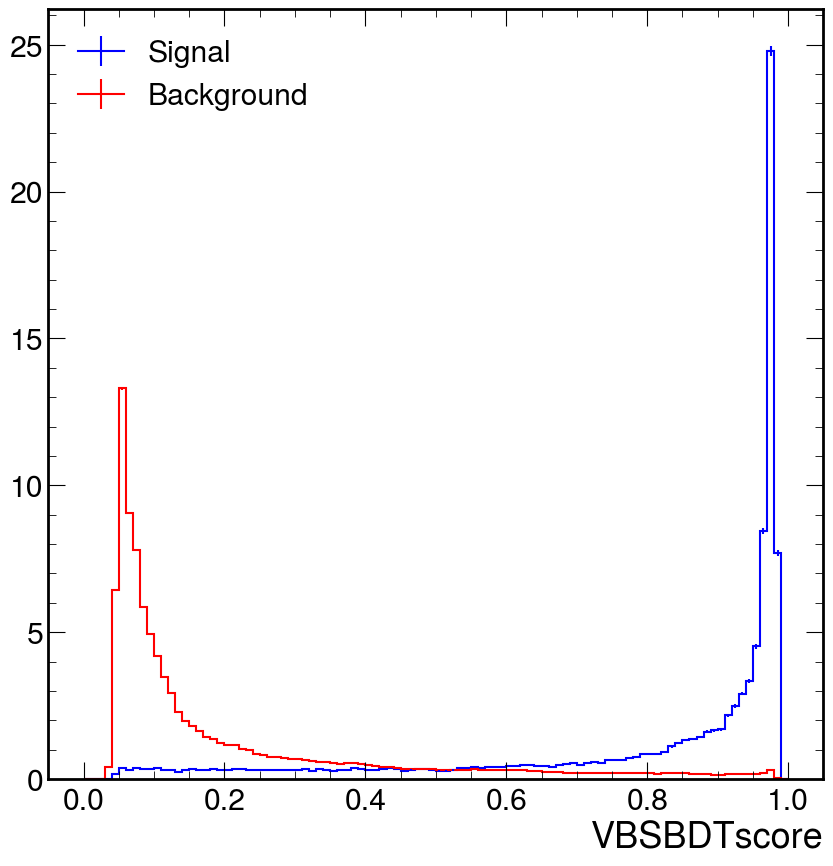

In [7]:
plot(rdf_sig, rdf_bkg, "VBSBDTscore")

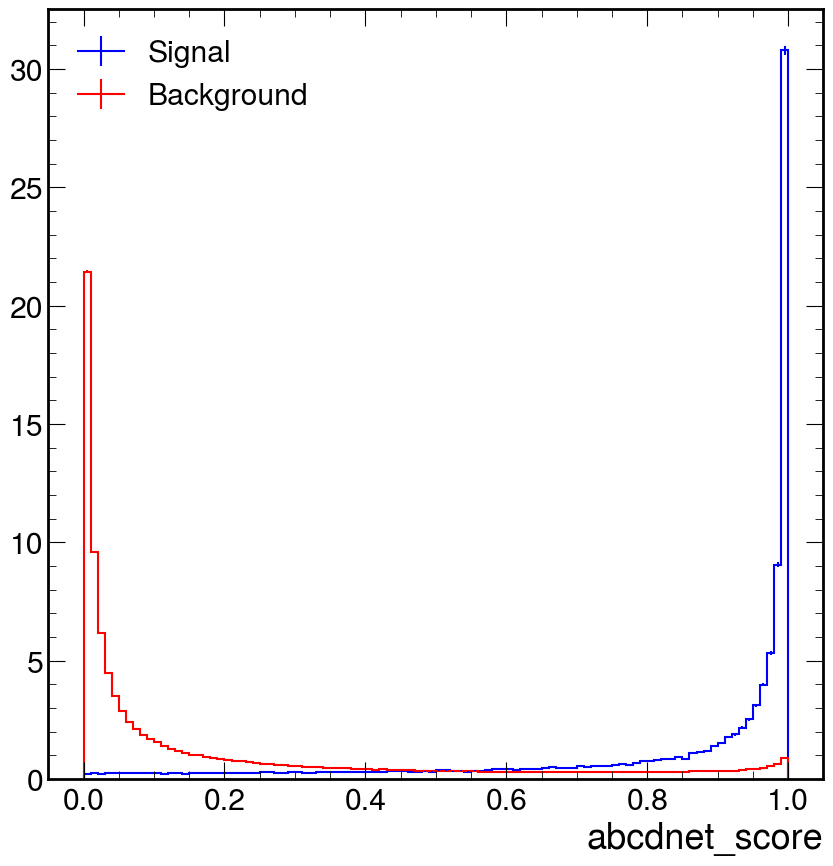

In [8]:
plot(rdf_sig, rdf_bkg, "abcdnet_score")